In [20]:
import pandas as pd

def format_bank_dataset(input_path, output_path):
    # Read the dataset from the input path (assuming it's in CSV format with a delimiter)
    dataset = pd.read_csv(input_path, delimiter=",")

    # If the dataset already has the correct format, return it as is
    if 'species' in dataset.columns:
        return dataset

    # Split the single column into separate columns using a delimiter (e.g., comma)
    dataset = dataset['sepal_length,sepal_width,petal_length,petal_width,species'].str.split(',', expand=True)

    # Rename the columns to match the expected column names
    dataset.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

    # Save the formatted dataset to the output path
    dataset.to_csv(output_path, index=False)

    return dataset

formatted_dataset = format_bank_dataset('data/IRIS.csv', 'data/NEW_IRIS.csv')

formatted_dataset

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [21]:
formatted_dataset.to_csv('data/NEW_IRIS.csv', index=False)

# DATA UNDERSTANDING

# Bank Dataset Analyzer

This class, `DatasetAnalyzer`, is designed to analyze a dataset related to banking. It provides various methods to gather insights about the dataset, identify patterns, and address data quality issues. This class is part of a broader data analysis and preprocessing process.

## How It Works

### Initialization

1. Import the necessary libraries: `pandas`, `matplotlib.pyplot`, `seaborn`, and `numpy`.

2. Define a class named `DatasetAnalyzer` that takes the path to the dataset as a parameter during initialization (`dataset_path`).

3. Inside the `__init__` method, the dataset is loaded using `pd.read_csv()` and stored as an attribute (`self.dataset`).

### Data Exploration and Analysis Methods

The class provides several methods to explore and analyze the dataset:

- `preview_dataset(num_rows)`: Displays the first and last few rows of the dataset.

- `check_columns_list()`: Returns a list of columns in the dataset.

- `explore_column_value_counts()`: Prints the value counts for each column in the dataset.

- `get_dataset_shape()`: Returns the number of rows and columns in the dataset.

- `get_dataset_info()`: Displays information about the dataset, including data types and memory usage.

- `get_dataset_description()`: Provides a statistical description of the dataset, including measures like mean, min, max, and quartiles.

- `analyze_duplicated_rows()`: Counts and visualizes the percentage of duplicated rows in the dataset.

- `analyze_missing_values()`: Counts and visualizes the percentage of missing values for each column in the dataset.

- `count_data_types()`: Returns the count of data types present in the dataset.

- `count_unique_values_by_dtype()`: Counts and prints the number of unique values for integer, float, and object columns.

Each method is designed to provide insights into different aspects of the dataset, helping to identify data quality issues, patterns, and trends.

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

class DatasetAnalyzer:
    def __init__(self, dataset_path):
        # Initialize the DatasetAnalyzer with the dataset path
        self.dataset_path = dataset_path
        self.dataset = pd.read_csv(dataset_path, delimiter=";")
        
    def preview_dataset(self, num_rows=5):
        # Display the first few and last few rows of the dataset
        print(f"Preview of the dataset (first {num_rows} rows):")
        print(self.dataset.head(num_rows))
        print(f"Preview of the dataset (last {num_rows} rows):")
        print(self.dataset.tail(num_rows))

    def check_columns_list(self):
        # Get the list of columns in the dataset
        return self.dataset.columns.tolist()

    def explore_column_value_counts(self):
        # Explore the value counts for each column
        column_value_counts = {}

        for column in self.dataset.columns:
            column_value_counts[column] = self.dataset[column].value_counts()

        for column, values in column_value_counts.items():
            print(f"Value Counts for Column '{column}':\n{values}\n")

    def get_dataset_shape(self):
        # Get the shape of the dataset
        return self.dataset.shape

    def get_dataset_info(self):
        # Get information about the dataset
        return self.dataset.info()

    def get_dataset_description(self):
        # Get a statistical description of the dataset
        return self.dataset.describe()

    def analyze_duplicated_rows(self):
        # Analyze duplicate rows
        duplicate_count = self.dataset.duplicated().sum()

        # Print duplicate rows count
        print("Duplicate Rows Count:", duplicate_count)

        # Calculate the percentage of duplicate rows
        duplicate_percentage = (duplicate_count / len(self.dataset)) * 100

        # Create a bar chart to visualize the percentage of duplicate rows
        plt.figure(figsize=(6, 4))
        sns.barplot(x=["Duplicate Rows", "Non-Duplicate Rows"],
                    y=[duplicate_percentage, 100 - duplicate_percentage], color='skyblue', edgecolor='black')
        plt.ylabel("Percentage (%)")
        plt.title("Percentage of Duplicated Rows")
        plt.tight_layout()
        plt.show()

    def analyze_missing_values(self):
        # Analyze missing values
        missing_values_count = self.dataset.isnull().sum()

        # Print missing values counts
        print("Missing Values Counts:")
        print(missing_values_count)

         # Calculate the percentage of missing values for each column
        missing_percentage = (self.dataset.isnull().sum() / len(self.dataset)) * 100

        # Create a bar chart to visualize the percentage of missing values
        plt.figure(figsize=(10, 6))
        sns.barplot(x=missing_percentage.index, y=missing_percentage.values, color='skyblue', edgecolor='black')
        plt.xlabel('Columns')
        plt.ylabel('Percentage of Missing Values')
        plt.title('Percentage of Missing Values in Each Column')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

    def count_data_types(self):
        # Count the data types in the dataset
        return self.dataset.dtypes.value_counts()

    def count_unique_values_by_dtype(self):
         # Group columns by data type
        data_types = self.dataset.dtypes

        # Separate columns by data type
        int_columns = data_types[data_types == 'int64'].index
        float_columns = data_types[data_types == 'float64'].index
        object_columns = data_types[data_types == 'object'].index
        
        print("Unique Values Counts by Data Type:")

        # Print columns and their counts for each data type
        print("Integer Columns:")
        print(self.dataset[int_columns].nunique())

        print("\nFloat Columns:")
        print(self.dataset[float_columns].nunique())

        print("\nObject Columns:")
        print(self.dataset[object_columns].nunique())

In [23]:
# Create an instance of DatasetAnalyzer
analyzer = DatasetAnalyzer("data/NEW_IRIS.csv")

In [24]:
# Preview the dataset
analyzer.preview_dataset()

Preview of the dataset (first 5 rows):
  sepal_length,sepal_width,petal_length,petal_width,species
0                        5.1,3.5,1.4,0.2,Iris-setosa       
1                        4.9,3.0,1.4,0.2,Iris-setosa       
2                        4.7,3.2,1.3,0.2,Iris-setosa       
3                        4.6,3.1,1.5,0.2,Iris-setosa       
4                        5.0,3.6,1.4,0.2,Iris-setosa       
Preview of the dataset (last 5 rows):
    sepal_length,sepal_width,petal_length,petal_width,species
145                     6.7,3.0,5.2,2.3,Iris-virginica       
146                     6.3,2.5,5.0,1.9,Iris-virginica       
147                     6.5,3.0,5.2,2.0,Iris-virginica       
148                     6.2,3.4,5.4,2.3,Iris-virginica       
149                     5.9,3.0,5.1,1.8,Iris-virginica       


In [25]:
# Get the list of columns in the dataset
columns_list = analyzer.check_columns_list()
print("Columns in the dataset:", columns_list)

Columns in the dataset: ['sepal_length,sepal_width,petal_length,petal_width,species']


In [26]:
# Explore value counts for each column
analyzer.explore_column_value_counts()

Value Counts for Column 'sepal_length,sepal_width,petal_length,petal_width,species':
4.9,3.1,1.5,0.1,Iris-setosa        3
5.8,2.7,5.1,1.9,Iris-virginica     2
6.5,3.0,5.8,2.2,Iris-virginica     1
5.4,3.9,1.7,0.4,Iris-setosa        1
5.7,4.4,1.5,0.4,Iris-setosa        1
                                  ..
5.6,3.0,4.5,1.5,Iris-versicolor    1
6.3,2.9,5.6,1.8,Iris-virginica     1
5.0,3.5,1.3,0.3,Iris-setosa        1
7.7,2.6,6.9,2.3,Iris-virginica     1
5.4,3.7,1.5,0.2,Iris-setosa        1
Name: sepal_length,sepal_width,petal_length,petal_width,species, Length: 147, dtype: int64



In [27]:
# Get the shape of the dataset
dataset_shape = analyzer.get_dataset_shape()
print("Shape of the dataset:", dataset_shape)

Shape of the dataset: (150, 1)


In [28]:
# Get information about the dataset
dataset_info = analyzer.get_dataset_info()
print("Information about the dataset:")
print(dataset_info)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 1 columns):
 #   Column                                                     Non-Null Count  Dtype 
---  ------                                                     --------------  ----- 
 0   sepal_length,sepal_width,petal_length,petal_width,species  150 non-null    object
dtypes: object(1)
memory usage: 1.3+ KB
Information about the dataset:
None


In [29]:
# Get a statistical description of the dataset
dataset_description = analyzer.get_dataset_description()
print("Statistical description of the dataset:")
print(dataset_description)

Statistical description of the dataset:
       sepal_length,sepal_width,petal_length,petal_width,species
count                                                 150       
unique                                                147       
top                           4.9,3.1,1.5,0.1,Iris-setosa       
freq                                                    3       


Duplicate Rows Count: 3


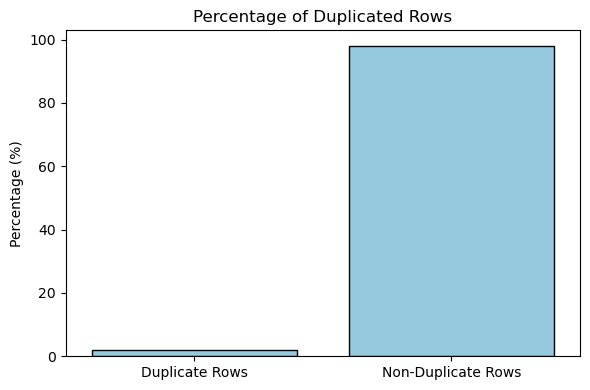

In [30]:
# Analyze duplicate rows and visualize the percentage
analyzer.analyze_duplicated_rows()

Missing Values Counts:
sepal_length,sepal_width,petal_length,petal_width,species    0
dtype: int64


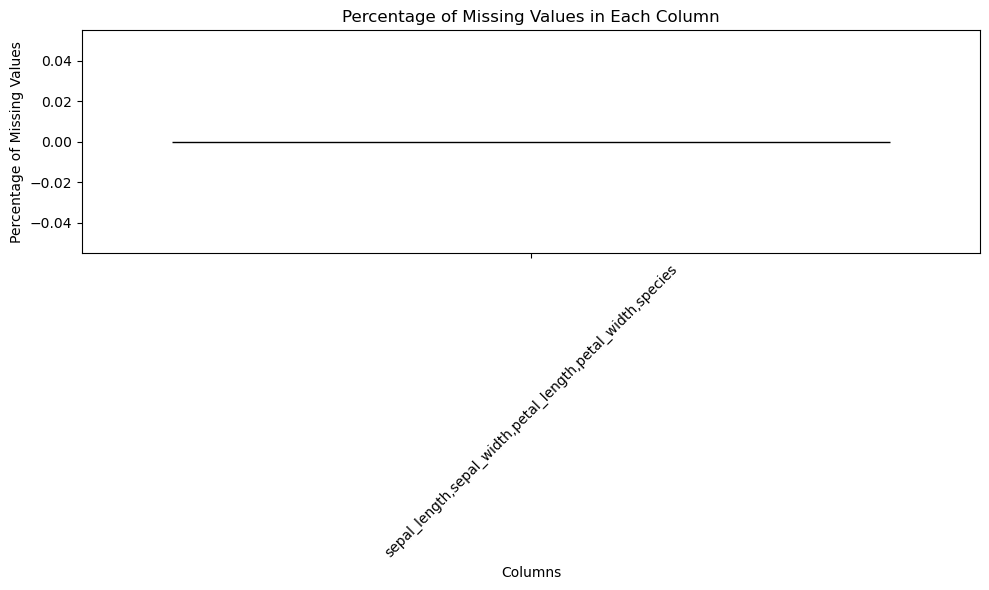

In [31]:
# Analyze missing values and visualize the percentage
analyzer.analyze_missing_values()

In [32]:
# Count data types in the dataset
data_type_counts = analyzer.count_data_types()
print("Data types counts:")
print(data_type_counts)

Data types counts:
object    1
dtype: int64


In [33]:
# Count unique values by data type
analyzer.count_unique_values_by_dtype()

Unique Values Counts by Data Type:
Integer Columns:
Series([], dtype: float64)

Float Columns:
Series([], dtype: float64)

Object Columns:
sepal_length,sepal_width,petal_length,petal_width,species    147
dtype: int64


EDA

In [35]:
# DATA CLEANING